In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, Model
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import math
import glob
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

2025-02-18 23:20:52.910805: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm
import re

In [3]:
datapath = "../../data/MobiAct_feature_aug.csv"
df = pd.read_csv(datapath)
df.head()

,AvgX,AvgY,AvgZ,MedianX,MedianY,MedianZ,StdX,StdY,StdZ,SkewX,...,AbsMaxZ,AbsSlope,MeanMag,StdMag,MinMag,MaxMag,DiffMinMaxMag,ZCR_Mag,AverageResultantAcceleration,label
0,7.079540,0.292400,3.763926,8.336310,-0.800637,4.799377,2.868003,4.616586,2.274586,-1.821233,...,12.732082,25.968431,99.065435,37.258635,29.541558,567.998312,538.456755,0,99.065435,BSC
1,7.173739,1.640782,4.361933,7.536947,1.973893,5.578871,2.253994,3.824003,2.581553,-1.826785,...,13.052741,28.237861,99.534564,41.252435,30.958310,514.237251,483.278940,0,99.534564,BSC
2,7.330632,2.381979,3.417897,8.192033,3.039308,4.317029,2.640936,4.069859,2.199644,-1.708481,...,10.945221,27.597204,99.455316,40.969060,20.501091,523.780867,503.279777,0,99.455316,BSC
3,-5.568553,-0.217635,6.616517,-6.148310,-0.676446,7.363430,2.473055,3.530614,1.962968,1.075171,...,18.426916,31.743260,97.257094,56.157126,2.593039,961.689593,959.096554,0,97.257094,BSC
4,-4.795033,0.358094,7.179030,-5.434174,0.013750,7.892242,2.168915,3.643256,2.230609,1.192495,...,19.105164,32.353318,97.600097,63.150734,2.032286,1033.791111,1031.758825,0,97.600097,BSC


In [4]:
df.info() 
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 59 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   AvgX                          3294 non-null   float64
 1   AvgY                          3294 non-null   float64
 2   AvgZ                          3294 non-null   float64
 3   MedianX                       3294 non-null   float64
 4   MedianY                       3294 non-null   float64
 5   MedianZ                       3294 non-null   float64
 6   StdX                          3294 non-null   float64
 7   StdY                          3294 non-null   float64
 8   StdZ                          3294 non-null   float64
 9   SkewX                         3294 non-null   float64
 10  SkewY                         3294 non-null   float64
 11  SkewZ                         3294 non-null   float64
 12  KurtosisX                     3294 non-null   float64
 13  Kur

,count,mean,std,min,25%,50%,75%,max
AvgX,3294.0,0.410833,3.628758,-9.886928,-1.945098,0.449712,2.950076,9.705663
AvgY,3294.0,4.251255,4.901131,-9.794727,1.638448,4.703366,8.814596,10.297934
AvgZ,3294.0,1.745927,4.209410,-9.826976,-0.297116,1.475094,5.766374,9.405894
MedianX,3294.0,0.406599,3.984900,-9.770841,-1.960339,0.311817,3.012170,9.819040
MedianY,3294.0,3.965840,5.433286,-10.408320,0.498359,3.532161,9.441478,11.140900
MedianZ,3294.0,1.766999,4.856065,-9.949785,-0.492540,0.822284,6.815637,9.553715
StdX,3294.0,2.372219,1.132904,0.035555,1.599901,2.211373,2.938132,7.859170
StdY,3294.0,3.822120,1.778256,0.023811,2.695819,3.277098,4.827666,9.902119
StdZ,3294.0,2.901933,1.017588,0.041281,2.207353,2.770354,3.573924,7.543139
SkewX,3294.0,-0.029612,1.237420,-4.765660,-0.797864,0.010570,0.791700,6.732506


In [5]:
print (df.isnull().sum()) 
print (any(df.isnull().sum()))

AvgX                            0
AvgY                            0
AvgZ                            0
MedianX                         0
MedianY                         0
MedianZ                         0
StdX                            0
StdY                            0
StdZ                            0
SkewX                           0
SkewY                           0
SkewZ                           0
KurtosisX                       0
KurtosisY                       0
KurtosisZ                       0
MinX                            0
MinY                            0
MinZ                            0
MaxX                            0
MaxY                            0
MaxZ                            0
Slope                           0
MeanTA                          0
StdTA                           0
SkewTA                          0
KurtosisTA                      0
AbsX                            0
AbsY                            0
AbsZ                            0
AbsMeanX      

In [6]:
from sklearn.preprocessing import StandardScaler

labels = df['label']
features = df.drop('label', axis=1)

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

df = pd.DataFrame(features_scaled, columns=features.columns)
df['label'] = labels

In [7]:
print (f"{np.unique(df['label'])}")
print (df['label'].value_counts())

normal_labels = list(np.unique(df['label']))
normal_labels.remove('FKL')
normal_labels.remove('FOL')

['BSC' 'CHU' 'CSI' 'CSO' 'FKL' 'FOL' 'JOG' 'JUM' 'SBE' 'SBW' 'SCH' 'SDL'
 'SIT' 'SLH' 'SLW' 'SRH' 'STD' 'STN' 'STU' 'WAL']
label
SCH    365
STN    365
STU    364
CSO    360
CSI    358
SDL    192
FKL    192
FOL    192
BSC    191
JUM    183
JOG    183
CHU    114
WAL     61
STD     60
SBW     19
SBE     19
SIT     19
SLH     19
SLW     19
SRH     19
Name: count, dtype: int64


In [8]:
train_data = []
train_labels = []
test_normal_data = []
test_normal_labels = []

for activity in normal_labels:
    activity_data = df[df['label'] == activity]
    split_idx = int(len(activity_data) * 0.7)
    
    activity_features = activity_data.drop('label', axis=1)  
    
    train_data.append(activity_features.iloc[:split_idx])
    train_labels.append(np.zeros(len(activity_features.iloc[:split_idx]))) 
    
    test_normal_data.append(activity_features.iloc[split_idx:])
    test_normal_labels.append(np.zeros(len(activity_features.iloc[split_idx:]))) 

fall_data = df[df['label'].isin(['FKL', 'FOL'])]
test_fall_data = fall_data.drop('label', axis=1)
test_fall_labels = np.ones(len(fall_data)) 

train_data = pd.concat(train_data)
train_labels = np.concatenate(train_labels)
test_adl_data = pd.concat(test_normal_data)
test_adl_labels = np.concatenate(test_normal_labels)

print("train_data shape:", train_data.shape)
print("train_labels shape:", train_labels.shape)
print("test_adl_data shape:", test_adl_data.shape)
print("test_adl_labels shape:", test_adl_labels.shape)
print("test_fall_data shape:", test_fall_data.shape)
print("test_fall_labels shape:", test_fall_labels.shape)

print (set(train_labels))
print (set(test_adl_labels))
print (set(test_fall_labels))

train_data shape: (2029, 58)
train_labels shape: (2029,)
test_adl_data shape: (881, 58)
test_adl_labels shape: (881,)
test_fall_data shape: (384, 58)
test_fall_labels shape: (384,)
{0.0}
{0.0}
{1.0}


In [9]:
def split_sequences(data, labels, n_steps, stride):
    X, y = list(), list()
    
    sequences = np.column_stack((data, labels))
    
    for i in range(0, len(sequences) - n_steps + 1, stride):
        end_ix = i + n_steps
        
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)

In [10]:
train_data, train_labels = split_sequences(train_data, train_labels, n_steps=50, stride=5)
test_adl_data, test_adl_labels = split_sequences(test_adl_data, test_adl_labels, n_steps=50, stride=5)
test_fall_data, test_fall_labels = split_sequences(test_fall_data, test_fall_labels, n_steps=50, stride=5)

print (train_data.shape, train_labels.shape)
print (test_adl_data.shape, test_adl_labels.shape)
print (test_fall_data.shape, test_fall_labels.shape)

(396, 50, 58) (396,)
(167, 50, 58) (167,)
(67, 50, 58) (67,)


----

In [11]:
EPOCHS = 300
INITIAL_LEARNING_RATE = 1e-3  
DECAY_STEPS = 1000  
DECAY_RATE = 0.98  
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
BATCH_SIZE = 32

In [12]:
class MobiActDataset(Dataset):
    def __init__(self, data):
        # Transpose data from [batch, window_length, features] to [batch, features, window_length]
        data = data.transpose(0, 2, 1)
        self.data = torch.FloatTensor(data)
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx]  # Returns shape [features, window_length]

In [13]:
class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DoubleConv, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=3, padding='same'),
            nn.ReLU(),
            nn.Conv1d(out_channels, out_channels, kernel_size=3, padding='same'),
            nn.ReLU()
        )
        
        # Multiple Linear layers with increasing complexity
        self.mlp = nn.Sequential(
            nn.Linear(out_channels, out_channels * 2),
            nn.ReLU(),
            nn.Linear(out_channels * 2, out_channels * 4),
            nn.ReLU(),
            nn.Linear(out_channels * 4, out_channels * 2),
            nn.ReLU(),
            nn.Linear(out_channels * 2, out_channels)
        )
        
        # Layer Normalization for better training stability
        self.layer_norm = nn.LayerNorm(out_channels)
        
    def forward(self, x):
        # Convolutional path
        x = self.conv(x)
        
        # Reshape for Linear layers
        batch_size, channels, seq_len = x.shape
        x = x.transpose(1, 2)  # (batch, seq_len, channels)
        
        # Apply MLP to each timestep
        x = self.mlp(x)
        
        # Layer normalization
        x = self.layer_norm(x)
        
        # Reshape back to Conv format
        x = x.transpose(1, 2)  # (batch, channels, seq_len)
        
        return x

In [14]:
class SinusoidalPositionEmbeddings(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.dim = dim

    def forward(self, time):
        device = time.device
        half_dim = self.dim // 2
        embeddings = math.log(10000) / (half_dim - 1)
        embeddings = torch.exp(torch.arange(half_dim, device=device) * -embeddings)
        embeddings = time[:, None] * embeddings[None, :]
        embeddings = torch.cat((embeddings.sin(), embeddings.cos()), dim=-1)
        return embeddings

In [15]:
class UNet1D(nn.Module):
    def __init__(self, in_channels=58):
        super(UNet1D, self).__init__()
        
        # Sinusoidal time embeddings
        self.time_embed = nn.Sequential(
            SinusoidalPositionEmbeddings(32),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 64)
        )
        
        # Encoder
        self.enc1 = DoubleConv(in_channels, 64)
        self.pool1 = nn.MaxPool1d(2, padding=0)
        
        self.enc2 = DoubleConv(64, 128)
        self.pool2 = nn.MaxPool1d(2, padding=0)
        
        self.enc3 = DoubleConv(128, 256)
        self.pool3 = nn.MaxPool1d(2, padding=0)
        
        # Bottleneck
        self.bottleneck = DoubleConv(256, 512)
        
        # Time feature projection
        self.time_mlp = nn.Linear(64, 512)
        
        # Decoder with output padding to match encoder sizes
        self.upconv3 = nn.ConvTranspose1d(512, 256, 2, stride=2, output_padding=0)
        self.dec3 = DoubleConv(512, 256)
        
        self.upconv2 = nn.ConvTranspose1d(256, 128, 2, stride=2, output_padding=0)
        self.dec2 = DoubleConv(256, 128)
        
        self.upconv1 = nn.ConvTranspose1d(128, 64, 2, stride=2, output_padding=0)
        self.dec1 = DoubleConv(128, 64)
        
        self.final_conv = nn.Conv1d(64, in_channels, 1)
        
    def forward(self, x, t):
        # Time embedding
        t_emb = self.time_embed(t)
        t_emb = self.time_mlp(t_emb)
        
        # Encoder
        e1 = self.enc1(x)
        p1 = self.pool1(e1)
        
        e2 = self.enc2(p1)
        p2 = self.pool2(e2)
        
        e3 = self.enc3(p2)
        p3 = self.pool3(e3)
        
        # Bottleneck with time embedding
        b = self.bottleneck(p3)
        b = b + t_emb.unsqueeze(-1)
        
        # Decoder with size adjustment if needed
        d3 = self.upconv3(b)
        if d3.shape[-1] != e3.shape[-1]:
            d3 = F.interpolate(d3, size=e3.shape[-1], mode='linear')
        d3 = torch.cat([d3, e3], dim=1)
        d3 = self.dec3(d3)
        
        d2 = self.upconv2(d3)
        if d2.shape[-1] != e2.shape[-1]:
            d2 = F.interpolate(d2, size=e2.shape[-1], mode='linear')
        d2 = torch.cat([d2, e2], dim=1)
        d2 = self.dec2(d2)
        
        d1 = self.upconv1(d2)
        if d1.shape[-1] != e1.shape[-1]:
            d1 = F.interpolate(d1, size=e1.shape[-1], mode='linear')
        d1 = torch.cat([d1, e1], dim=1)
        d1 = self.dec1(d1)
        
        return self.final_conv(d1)

In [16]:
class DDPM:
    def __init__(self, num_timesteps=1000, beta_start=1e-4, beta_end=0.02):
        """
        num_timesteps: total diffusion steps T
        beta_start, beta_end: β₁ and βₜ for linear schedule
        """
        self.num_timesteps = num_timesteps
        
        # Linear variance schedule
        self.betas = torch.linspace(beta_start, beta_end, num_timesteps)
        self.alphas = 1. - self.betas
        self.alphas_cumprod = torch.cumprod(self.alphas, dim=0)
        
    def q_sample(self, x_0, t):
        """
        Forward diffusion process: q(x_t | x_0)
        Samples from q(x_t | x_0) = N(x_t; √(αₜ)x₀, (1-αₜ)I)
        """
        sqrt_alphas_cumprod = torch.sqrt(self.alphas_cumprod[t])[:, None, None]
        sqrt_one_minus_alphas_cumprod = torch.sqrt(1. - self.alphas_cumprod[t])[:, None, None]
        epsilon = torch.randn_like(x_0)
        return sqrt_alphas_cumprod * x_0 + sqrt_one_minus_alphas_cumprod * epsilon, epsilon
    
    def sample_t(self, batch_size):
        """
        Uniformly sample timesteps t
        """
        return torch.randint(0, self.num_timesteps, (batch_size,))
        
    def p_sample(self, model, batch_size, device, shape):
        """
        Reverse diffusion process: p_θ(x_{t-1} | x_t)
        Generate samples using the reverse process
        """
        model.eval()
        with torch.no_grad():
            x_t = torch.randn(batch_size, *shape).to(device)
            
            for t in reversed(range(1, self.num_timesteps)):
                time_tensor = torch.ones(batch_size, dtype=torch.long).to(device) * t
                
                # Predict noise
                predicted_noise = model(x_t, time_tensor)
                
                alpha = self.alphas[t][:, None, None]
                alpha_cumprod = self.alphas_cumprod[t][:, None, None]
                beta = self.betas[t][:, None, None]
                
                # Add noise for stochasticity
                noise = torch.randn_like(x_t)
                
                # Compute mean for p_θ(x_{t-1} | x_t)
                x_t = 1 / torch.sqrt(alpha) * (
                    x_t - (1 - alpha) / torch.sqrt(1 - alpha_cumprod) * predicted_noise
                ) + torch.sqrt(beta) * noise
                
        model.train()
        return x_t

In [17]:
def train_ddpm(model, train_loader, ddpm, optimizer, num_epochs, device, scheduler):
    model.train()
    
    for epoch in range(num_epochs):
        epoch_loss = 0
        n_batches = len(train_loader)
        
        for batch in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}'):
            # batch is already [batch, features, window_length]
            x_0 = batch.to(device)
            batch_size = x_0.shape[0]
            
            optimizer.zero_grad()
            t = ddpm.sample_t(batch_size).to(device)
            x_t, epsilon = ddpm.q_sample(x_0, t)
            epsilon_theta = model(x_t, t)
            loss = F.mse_loss(epsilon_theta, epsilon)
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
            scheduler.step()
        
        avg_loss = epoch_loss / n_batches
        print(f'Epoch {epoch+1}/{num_epochs} - Avg Loss: {avg_loss:.4f}')

In [18]:
model = UNet1D().to(device)
ddpm = DDPM(num_timesteps=1000)  
optimizer = optim.AdamW(  
    model.parameters(),
    lr=1e-4,
    weight_decay=0.01 
)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=EPOCHS) 

train_dataset = MobiActDataset(train_data)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE)

train_ddpm(
    model=model,
    train_loader=train_loader,
    ddpm=ddpm,
    optimizer=optimizer,
    num_epochs=EPOCHS,
    device=device,
    scheduler=scheduler
)

Epoch 1/300: 100%|████████████████████████████████| 13/13 [00:02<00:00,  4.63it/s]


Epoch 1/300 - Avg Loss: 1.1743


Epoch 2/300: 100%|████████████████████████████████| 13/13 [00:02<00:00,  6.41it/s]


Epoch 2/300 - Avg Loss: 1.0601


Epoch 3/300: 100%|████████████████████████████████| 13/13 [00:02<00:00,  5.70it/s]


Epoch 3/300 - Avg Loss: 1.0229


Epoch 4/300: 100%|████████████████████████████████| 13/13 [00:02<00:00,  5.80it/s]


Epoch 4/300 - Avg Loss: 1.0136


Epoch 5/300: 100%|████████████████████████████████| 13/13 [00:02<00:00,  5.14it/s]


Epoch 5/300 - Avg Loss: 1.0027


Epoch 6/300: 100%|████████████████████████████████| 13/13 [00:02<00:00,  6.37it/s]


Epoch 6/300 - Avg Loss: 1.0005


Epoch 7/300: 100%|████████████████████████████████| 13/13 [00:02<00:00,  4.65it/s]


Epoch 7/300 - Avg Loss: 0.9996


Epoch 8/300: 100%|████████████████████████████████| 13/13 [00:02<00:00,  5.33it/s]


Epoch 8/300 - Avg Loss: 0.9983


Epoch 9/300: 100%|████████████████████████████████| 13/13 [00:02<00:00,  6.39it/s]


Epoch 9/300 - Avg Loss: 0.9985


Epoch 10/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  6.23it/s]


Epoch 10/300 - Avg Loss: 0.9978


Epoch 11/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  5.98it/s]


Epoch 11/300 - Avg Loss: 0.9955


Epoch 12/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  5.44it/s]


Epoch 12/300 - Avg Loss: 0.9955


Epoch 13/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  5.77it/s]


Epoch 13/300 - Avg Loss: 0.9911


Epoch 14/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  4.96it/s]


Epoch 14/300 - Avg Loss: 0.9880


Epoch 15/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  5.13it/s]


Epoch 15/300 - Avg Loss: 0.9851


Epoch 16/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  4.74it/s]


Epoch 16/300 - Avg Loss: 0.9814


Epoch 17/300: 100%|███████████████████████████████| 13/13 [00:03<00:00,  4.24it/s]


Epoch 17/300 - Avg Loss: 0.9794


Epoch 18/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  5.08it/s]


Epoch 18/300 - Avg Loss: 0.9812


Epoch 19/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  4.69it/s]


Epoch 19/300 - Avg Loss: 0.9788


Epoch 20/300: 100%|███████████████████████████████| 13/13 [00:03<00:00,  3.89it/s]


Epoch 20/300 - Avg Loss: 0.9764


Epoch 21/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  5.33it/s]


Epoch 21/300 - Avg Loss: 0.9793


Epoch 22/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  4.98it/s]


Epoch 22/300 - Avg Loss: 0.9806


Epoch 23/300: 100%|███████████████████████████████| 13/13 [00:03<00:00,  3.51it/s]


Epoch 23/300 - Avg Loss: 0.9780


Epoch 24/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  4.67it/s]


Epoch 24/300 - Avg Loss: 0.9786


Epoch 25/300: 100%|███████████████████████████████| 13/13 [00:03<00:00,  3.77it/s]


Epoch 25/300 - Avg Loss: 0.9762


Epoch 26/300: 100%|███████████████████████████████| 13/13 [00:04<00:00,  3.15it/s]


Epoch 26/300 - Avg Loss: 0.9775


Epoch 27/300: 100%|███████████████████████████████| 13/13 [00:03<00:00,  4.08it/s]


Epoch 27/300 - Avg Loss: 0.9791


Epoch 28/300: 100%|███████████████████████████████| 13/13 [00:03<00:00,  4.06it/s]


Epoch 28/300 - Avg Loss: 0.9752


Epoch 29/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  4.86it/s]


Epoch 29/300 - Avg Loss: 0.9749


Epoch 30/300: 100%|███████████████████████████████| 13/13 [00:03<00:00,  3.43it/s]


Epoch 30/300 - Avg Loss: 0.9747


Epoch 31/300: 100%|███████████████████████████████| 13/13 [00:03<00:00,  3.28it/s]


Epoch 31/300 - Avg Loss: 0.9720


Epoch 32/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  4.71it/s]


Epoch 32/300 - Avg Loss: 0.9731


Epoch 33/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  5.10it/s]


Epoch 33/300 - Avg Loss: 0.9691


Epoch 34/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  4.89it/s]


Epoch 34/300 - Avg Loss: 0.9671


Epoch 35/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  4.78it/s]


Epoch 35/300 - Avg Loss: 0.9635


Epoch 36/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  4.94it/s]


Epoch 36/300 - Avg Loss: 0.9599


Epoch 37/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  5.24it/s]


Epoch 37/300 - Avg Loss: 0.9544


Epoch 38/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  5.00it/s]


Epoch 38/300 - Avg Loss: 0.9519


Epoch 39/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  4.53it/s]


Epoch 39/300 - Avg Loss: 0.9487


Epoch 40/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  4.82it/s]


Epoch 40/300 - Avg Loss: 0.9449


Epoch 41/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  4.94it/s]


Epoch 41/300 - Avg Loss: 0.9378


Epoch 42/300: 100%|███████████████████████████████| 13/13 [00:03<00:00,  4.10it/s]


Epoch 42/300 - Avg Loss: 0.9331


Epoch 43/300: 100%|███████████████████████████████| 13/13 [00:03<00:00,  4.07it/s]


Epoch 43/300 - Avg Loss: 0.9293


Epoch 44/300: 100%|███████████████████████████████| 13/13 [00:03<00:00,  3.66it/s]


Epoch 44/300 - Avg Loss: 0.9230


Epoch 45/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  4.71it/s]


Epoch 45/300 - Avg Loss: 0.9172


Epoch 46/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  4.62it/s]


Epoch 46/300 - Avg Loss: 0.9127


Epoch 47/300: 100%|███████████████████████████████| 13/13 [00:03<00:00,  3.54it/s]


Epoch 47/300 - Avg Loss: 0.9094


Epoch 48/300: 100%|███████████████████████████████| 13/13 [00:03<00:00,  3.85it/s]


Epoch 48/300 - Avg Loss: 0.9028


Epoch 49/300: 100%|███████████████████████████████| 13/13 [00:03<00:00,  3.75it/s]


Epoch 49/300 - Avg Loss: 0.8990


Epoch 50/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  4.57it/s]


Epoch 50/300 - Avg Loss: 0.8928


Epoch 51/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  4.87it/s]


Epoch 51/300 - Avg Loss: 0.8884


Epoch 52/300: 100%|███████████████████████████████| 13/13 [00:03<00:00,  3.87it/s]


Epoch 52/300 - Avg Loss: 0.8811


Epoch 53/300: 100%|███████████████████████████████| 13/13 [00:03<00:00,  3.70it/s]


Epoch 53/300 - Avg Loss: 0.8823


Epoch 54/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  4.43it/s]


Epoch 54/300 - Avg Loss: 0.8753


Epoch 55/300: 100%|███████████████████████████████| 13/13 [00:03<00:00,  4.05it/s]


Epoch 55/300 - Avg Loss: 0.8701


Epoch 56/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  4.38it/s]


Epoch 56/300 - Avg Loss: 0.8713


Epoch 57/300: 100%|███████████████████████████████| 13/13 [00:03<00:00,  3.98it/s]


Epoch 57/300 - Avg Loss: 0.8672


Epoch 58/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  4.72it/s]


Epoch 58/300 - Avg Loss: 0.8646


Epoch 59/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  4.98it/s]


Epoch 59/300 - Avg Loss: 0.8651


Epoch 60/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  4.55it/s]


Epoch 60/300 - Avg Loss: 0.8642


Epoch 61/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  4.62it/s]


Epoch 61/300 - Avg Loss: 0.8601


Epoch 62/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  4.72it/s]


Epoch 62/300 - Avg Loss: 0.8577


Epoch 63/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  5.09it/s]


Epoch 63/300 - Avg Loss: 0.8608


Epoch 64/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  5.80it/s]


Epoch 64/300 - Avg Loss: 0.8555


Epoch 65/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  5.79it/s]


Epoch 65/300 - Avg Loss: 0.8568


Epoch 66/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  5.67it/s]


Epoch 66/300 - Avg Loss: 0.8548


Epoch 67/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  5.84it/s]


Epoch 67/300 - Avg Loss: 0.8488


Epoch 68/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  5.73it/s]


Epoch 68/300 - Avg Loss: 0.8498


Epoch 69/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  5.64it/s]


Epoch 69/300 - Avg Loss: 0.8572


Epoch 70/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  5.42it/s]


Epoch 70/300 - Avg Loss: 0.8516


Epoch 71/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  5.70it/s]


Epoch 71/300 - Avg Loss: 0.8541


Epoch 72/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  5.85it/s]


Epoch 72/300 - Avg Loss: 0.8547


Epoch 73/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  5.00it/s]


Epoch 73/300 - Avg Loss: 0.8488


Epoch 74/300: 100%|███████████████████████████████| 13/13 [00:03<00:00,  4.12it/s]


Epoch 74/300 - Avg Loss: 0.8505


Epoch 75/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  4.60it/s]


Epoch 75/300 - Avg Loss: 0.8531


Epoch 76/300: 100%|███████████████████████████████| 13/13 [00:03<00:00,  4.01it/s]


Epoch 76/300 - Avg Loss: 0.8518


Epoch 77/300: 100%|███████████████████████████████| 13/13 [00:03<00:00,  4.30it/s]


Epoch 77/300 - Avg Loss: 0.8519


Epoch 78/300: 100%|███████████████████████████████| 13/13 [00:03<00:00,  4.12it/s]


Epoch 78/300 - Avg Loss: 0.8499


Epoch 79/300: 100%|███████████████████████████████| 13/13 [00:03<00:00,  3.82it/s]


Epoch 79/300 - Avg Loss: 0.8512


Epoch 80/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  5.60it/s]


Epoch 80/300 - Avg Loss: 0.8471


Epoch 81/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  5.63it/s]


Epoch 81/300 - Avg Loss: 0.8456


Epoch 82/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  5.50it/s]


Epoch 82/300 - Avg Loss: 0.8455


Epoch 83/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  5.59it/s]


Epoch 83/300 - Avg Loss: 0.8384


Epoch 84/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  4.89it/s]


Epoch 84/300 - Avg Loss: 0.8415


Epoch 85/300: 100%|███████████████████████████████| 13/13 [00:03<00:00,  4.22it/s]


Epoch 85/300 - Avg Loss: 0.8412


Epoch 86/300: 100%|███████████████████████████████| 13/13 [00:03<00:00,  3.42it/s]


Epoch 86/300 - Avg Loss: 0.8404


Epoch 87/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  4.70it/s]


Epoch 87/300 - Avg Loss: 0.8398


Epoch 88/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  4.42it/s]


Epoch 88/300 - Avg Loss: 0.8406


Epoch 89/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  4.77it/s]


Epoch 89/300 - Avg Loss: 0.8361


Epoch 90/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  5.21it/s]


Epoch 90/300 - Avg Loss: 0.8275


Epoch 91/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  4.68it/s]


Epoch 91/300 - Avg Loss: 0.8340


Epoch 92/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  5.00it/s]


Epoch 92/300 - Avg Loss: 0.8242


Epoch 93/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  4.97it/s]


Epoch 93/300 - Avg Loss: 0.8272


Epoch 94/300: 100%|███████████████████████████████| 13/13 [00:03<00:00,  4.10it/s]


Epoch 94/300 - Avg Loss: 0.8218


Epoch 95/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  4.46it/s]


Epoch 95/300 - Avg Loss: 0.8162


Epoch 96/300: 100%|███████████████████████████████| 13/13 [00:02<00:00,  4.33it/s]


Epoch 96/300 - Avg Loss: 0.8219


Epoch 97/300: 100%|███████████████████████████████| 13/13 [00:04<00:00,  2.89it/s]


Epoch 97/300 - Avg Loss: 0.8149


Epoch 98/300: 100%|███████████████████████████████| 13/13 [00:04<00:00,  3.03it/s]


Epoch 98/300 - Avg Loss: 0.8112


Epoch 99/300: 100%|███████████████████████████████| 13/13 [00:03<00:00,  3.89it/s]


Epoch 99/300 - Avg Loss: 0.8066


Epoch 100/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.05it/s]


Epoch 100/300 - Avg Loss: 0.8026


Epoch 101/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.54it/s]


Epoch 101/300 - Avg Loss: 0.8001


Epoch 102/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.76it/s]


Epoch 102/300 - Avg Loss: 0.8038


Epoch 103/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.72it/s]


Epoch 103/300 - Avg Loss: 0.8007


Epoch 104/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.20it/s]


Epoch 104/300 - Avg Loss: 0.7973


Epoch 105/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  4.74it/s]


Epoch 105/300 - Avg Loss: 0.7961


Epoch 106/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.71it/s]


Epoch 106/300 - Avg Loss: 0.8027


Epoch 107/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  4.47it/s]


Epoch 107/300 - Avg Loss: 0.7982


Epoch 108/300: 100%|██████████████████████████████| 13/13 [00:04<00:00,  2.76it/s]


Epoch 108/300 - Avg Loss: 0.7898


Epoch 109/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.83it/s]


Epoch 109/300 - Avg Loss: 0.7912


Epoch 110/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.33it/s]


Epoch 110/300 - Avg Loss: 0.7865


Epoch 111/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.74it/s]


Epoch 111/300 - Avg Loss: 0.7973


Epoch 112/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.07it/s]


Epoch 112/300 - Avg Loss: 0.7922


Epoch 113/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.69it/s]


Epoch 113/300 - Avg Loss: 0.7927


Epoch 114/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.81it/s]


Epoch 114/300 - Avg Loss: 0.7898


Epoch 115/300: 100%|██████████████████████████████| 13/13 [00:04<00:00,  3.05it/s]


Epoch 115/300 - Avg Loss: 0.7942


Epoch 116/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.50it/s]


Epoch 116/300 - Avg Loss: 0.7892


Epoch 117/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  4.37it/s]


Epoch 117/300 - Avg Loss: 0.7880


Epoch 118/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  4.49it/s]


Epoch 118/300 - Avg Loss: 0.7883


Epoch 119/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.78it/s]


Epoch 119/300 - Avg Loss: 0.7894


Epoch 120/300: 100%|██████████████████████████████| 13/13 [00:04<00:00,  3.19it/s]


Epoch 120/300 - Avg Loss: 0.7864


Epoch 121/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.44it/s]


Epoch 121/300 - Avg Loss: 0.7825


Epoch 122/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.95it/s]


Epoch 122/300 - Avg Loss: 0.7881


Epoch 123/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  4.62it/s]


Epoch 123/300 - Avg Loss: 0.7889


Epoch 124/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  4.34it/s]


Epoch 124/300 - Avg Loss: 0.7903


Epoch 125/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.14it/s]


Epoch 125/300 - Avg Loss: 0.7870


Epoch 126/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.29it/s]


Epoch 126/300 - Avg Loss: 0.7806


Epoch 127/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  5.09it/s]


Epoch 127/300 - Avg Loss: 0.7906


Epoch 128/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.17it/s]


Epoch 128/300 - Avg Loss: 0.7869


Epoch 129/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.26it/s]


Epoch 129/300 - Avg Loss: 0.7885


Epoch 130/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  4.40it/s]


Epoch 130/300 - Avg Loss: 0.7768


Epoch 131/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.26it/s]


Epoch 131/300 - Avg Loss: 0.7853


Epoch 132/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.75it/s]


Epoch 132/300 - Avg Loss: 0.7829


Epoch 133/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.02it/s]


Epoch 133/300 - Avg Loss: 0.7821


Epoch 134/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  4.35it/s]


Epoch 134/300 - Avg Loss: 0.7793


Epoch 135/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.12it/s]


Epoch 135/300 - Avg Loss: 0.7830


Epoch 136/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  4.68it/s]


Epoch 136/300 - Avg Loss: 0.7780


Epoch 137/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  4.41it/s]


Epoch 137/300 - Avg Loss: 0.7876


Epoch 138/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.07it/s]


Epoch 138/300 - Avg Loss: 0.7796


Epoch 139/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.19it/s]


Epoch 139/300 - Avg Loss: 0.7730


Epoch 140/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.33it/s]


Epoch 140/300 - Avg Loss: 0.7708


Epoch 141/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.10it/s]


Epoch 141/300 - Avg Loss: 0.7705


Epoch 142/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.33it/s]


Epoch 142/300 - Avg Loss: 0.7637


Epoch 143/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  4.42it/s]


Epoch 143/300 - Avg Loss: 0.7734


Epoch 144/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  4.47it/s]


Epoch 144/300 - Avg Loss: 0.7621


Epoch 145/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.19it/s]


Epoch 145/300 - Avg Loss: 0.7613


Epoch 146/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.99it/s]


Epoch 146/300 - Avg Loss: 0.7629


Epoch 147/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.22it/s]


Epoch 147/300 - Avg Loss: 0.7648


Epoch 148/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  4.61it/s]


Epoch 148/300 - Avg Loss: 0.7625


Epoch 149/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.81it/s]


Epoch 149/300 - Avg Loss: 0.7616


Epoch 150/300: 100%|██████████████████████████████| 13/13 [00:04<00:00,  2.63it/s]


Epoch 150/300 - Avg Loss: 0.7617


Epoch 151/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.78it/s]


Epoch 151/300 - Avg Loss: 0.7560


Epoch 152/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.55it/s]


Epoch 152/300 - Avg Loss: 0.7529


Epoch 153/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  4.49it/s]


Epoch 153/300 - Avg Loss: 0.7509


Epoch 154/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.82it/s]


Epoch 154/300 - Avg Loss: 0.7548


Epoch 155/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  4.50it/s]


Epoch 155/300 - Avg Loss: 0.7533


Epoch 156/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.86it/s]


Epoch 156/300 - Avg Loss: 0.7552


Epoch 157/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.51it/s]


Epoch 157/300 - Avg Loss: 0.7538


Epoch 158/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  4.43it/s]


Epoch 158/300 - Avg Loss: 0.7428


Epoch 159/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.26it/s]


Epoch 159/300 - Avg Loss: 0.7505


Epoch 160/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.76it/s]


Epoch 160/300 - Avg Loss: 0.7468


Epoch 161/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.30it/s]


Epoch 161/300 - Avg Loss: 0.7592


Epoch 162/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.53it/s]


Epoch 162/300 - Avg Loss: 0.7473


Epoch 163/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.42it/s]


Epoch 163/300 - Avg Loss: 0.7486


Epoch 164/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.13it/s]


Epoch 164/300 - Avg Loss: 0.7490


Epoch 165/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.27it/s]


Epoch 165/300 - Avg Loss: 0.7495


Epoch 166/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.26it/s]


Epoch 166/300 - Avg Loss: 0.7506


Epoch 167/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.11it/s]


Epoch 167/300 - Avg Loss: 0.7476


Epoch 168/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.12it/s]


Epoch 168/300 - Avg Loss: 0.7468


Epoch 169/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  4.79it/s]


Epoch 169/300 - Avg Loss: 0.7499


Epoch 170/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  4.52it/s]


Epoch 170/300 - Avg Loss: 0.7459


Epoch 171/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.08it/s]


Epoch 171/300 - Avg Loss: 0.7503


Epoch 172/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.93it/s]


Epoch 172/300 - Avg Loss: 0.7526


Epoch 173/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.77it/s]


Epoch 173/300 - Avg Loss: 0.7506


Epoch 174/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.19it/s]


Epoch 174/300 - Avg Loss: 0.7505


Epoch 175/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.49it/s]


Epoch 175/300 - Avg Loss: 0.7513


Epoch 176/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.06it/s]


Epoch 176/300 - Avg Loss: 0.7509


Epoch 177/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.77it/s]


Epoch 177/300 - Avg Loss: 0.7508


Epoch 178/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  4.55it/s]


Epoch 178/300 - Avg Loss: 0.7508


Epoch 179/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  4.44it/s]


Epoch 179/300 - Avg Loss: 0.7525


Epoch 180/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.20it/s]


Epoch 180/300 - Avg Loss: 0.7560


Epoch 181/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  4.64it/s]


Epoch 181/300 - Avg Loss: 0.7564


Epoch 182/300: 100%|██████████████████████████████| 13/13 [00:04<00:00,  2.88it/s]


Epoch 182/300 - Avg Loss: 0.7482


Epoch 183/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.94it/s]


Epoch 183/300 - Avg Loss: 0.7406


Epoch 184/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  4.50it/s]


Epoch 184/300 - Avg Loss: 0.7453


Epoch 185/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.85it/s]


Epoch 185/300 - Avg Loss: 0.7435


Epoch 186/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.75it/s]


Epoch 186/300 - Avg Loss: 0.7429


Epoch 187/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.14it/s]


Epoch 187/300 - Avg Loss: 0.7417


Epoch 188/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  4.37it/s]


Epoch 188/300 - Avg Loss: 0.7493


Epoch 189/300: 100%|██████████████████████████████| 13/13 [00:04<00:00,  2.97it/s]


Epoch 189/300 - Avg Loss: 0.7438


Epoch 190/300: 100%|██████████████████████████████| 13/13 [00:04<00:00,  2.88it/s]


Epoch 190/300 - Avg Loss: 0.7359


Epoch 191/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  4.42it/s]


Epoch 191/300 - Avg Loss: 0.7368


Epoch 192/300: 100%|██████████████████████████████| 13/13 [00:04<00:00,  3.10it/s]


Epoch 192/300 - Avg Loss: 0.7315


Epoch 193/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.62it/s]


Epoch 193/300 - Avg Loss: 0.7314


Epoch 194/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.12it/s]


Epoch 194/300 - Avg Loss: 0.7316


Epoch 195/300: 100%|██████████████████████████████| 13/13 [00:04<00:00,  3.18it/s]


Epoch 195/300 - Avg Loss: 0.7375


Epoch 196/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.31it/s]


Epoch 196/300 - Avg Loss: 0.7340


Epoch 197/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.27it/s]


Epoch 197/300 - Avg Loss: 0.7323


Epoch 198/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.28it/s]


Epoch 198/300 - Avg Loss: 0.7308


Epoch 199/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.37it/s]


Epoch 199/300 - Avg Loss: 0.7292


Epoch 200/300: 100%|██████████████████████████████| 13/13 [00:04<00:00,  3.18it/s]


Epoch 200/300 - Avg Loss: 0.7277


Epoch 201/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.27it/s]


Epoch 201/300 - Avg Loss: 0.7217


Epoch 202/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.14it/s]


Epoch 202/300 - Avg Loss: 0.7279


Epoch 203/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.97it/s]


Epoch 203/300 - Avg Loss: 0.7231


Epoch 204/300: 100%|██████████████████████████████| 13/13 [00:05<00:00,  2.55it/s]


Epoch 204/300 - Avg Loss: 0.7180


Epoch 205/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.09it/s]


Epoch 205/300 - Avg Loss: 0.7242


Epoch 206/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.15it/s]


Epoch 206/300 - Avg Loss: 0.7209


Epoch 207/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.24it/s]


Epoch 207/300 - Avg Loss: 0.7212


Epoch 208/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.12it/s]


Epoch 208/300 - Avg Loss: 0.7275


Epoch 209/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  4.52it/s]


Epoch 209/300 - Avg Loss: 0.7204


Epoch 210/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  4.51it/s]


Epoch 210/300 - Avg Loss: 0.7265


Epoch 211/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.15it/s]


Epoch 211/300 - Avg Loss: 0.7233


Epoch 212/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.30it/s]


Epoch 212/300 - Avg Loss: 0.7211


Epoch 213/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.24it/s]


Epoch 213/300 - Avg Loss: 0.7248


Epoch 214/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  4.52it/s]


Epoch 214/300 - Avg Loss: 0.7177


Epoch 215/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.29it/s]


Epoch 215/300 - Avg Loss: 0.7236


Epoch 216/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.64it/s]


Epoch 216/300 - Avg Loss: 0.7258


Epoch 217/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.75it/s]


Epoch 217/300 - Avg Loss: 0.7254


Epoch 218/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.17it/s]


Epoch 218/300 - Avg Loss: 0.7184


Epoch 219/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  4.35it/s]


Epoch 219/300 - Avg Loss: 0.7215


Epoch 220/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.41it/s]


Epoch 220/300 - Avg Loss: 0.7210


Epoch 221/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.60it/s]


Epoch 221/300 - Avg Loss: 0.7232


Epoch 222/300: 100%|██████████████████████████████| 13/13 [00:04<00:00,  3.08it/s]


Epoch 222/300 - Avg Loss: 0.7139


Epoch 223/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.94it/s]


Epoch 223/300 - Avg Loss: 0.7229


Epoch 224/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.19it/s]


Epoch 224/300 - Avg Loss: 0.7189


Epoch 225/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  4.60it/s]


Epoch 225/300 - Avg Loss: 0.7223


Epoch 226/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  4.84it/s]


Epoch 226/300 - Avg Loss: 0.7259


Epoch 227/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.19it/s]


Epoch 227/300 - Avg Loss: 0.7165


Epoch 228/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.56it/s]


Epoch 228/300 - Avg Loss: 0.7273


Epoch 229/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.24it/s]


Epoch 229/300 - Avg Loss: 0.7211


Epoch 230/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.65it/s]


Epoch 230/300 - Avg Loss: 0.7247


Epoch 231/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.14it/s]


Epoch 231/300 - Avg Loss: 0.7216


Epoch 232/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.19it/s]


Epoch 232/300 - Avg Loss: 0.7154


Epoch 233/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  4.95it/s]


Epoch 233/300 - Avg Loss: 0.7165


Epoch 234/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  4.79it/s]


Epoch 234/300 - Avg Loss: 0.7132


Epoch 235/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  4.78it/s]


Epoch 235/300 - Avg Loss: 0.7099


Epoch 236/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  5.16it/s]


Epoch 236/300 - Avg Loss: 0.7116


Epoch 237/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.26it/s]


Epoch 237/300 - Avg Loss: 0.7093


Epoch 238/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.97it/s]


Epoch 238/300 - Avg Loss: 0.7173


Epoch 239/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.95it/s]


Epoch 239/300 - Avg Loss: 0.7116


Epoch 240/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.08it/s]


Epoch 240/300 - Avg Loss: 0.7063


Epoch 241/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.31it/s]


Epoch 241/300 - Avg Loss: 0.7100


Epoch 242/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.47it/s]


Epoch 242/300 - Avg Loss: 0.7117


Epoch 243/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.64it/s]


Epoch 243/300 - Avg Loss: 0.7065


Epoch 244/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.61it/s]


Epoch 244/300 - Avg Loss: 0.7089


Epoch 245/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  4.85it/s]


Epoch 245/300 - Avg Loss: 0.7013


Epoch 246/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.87it/s]


Epoch 246/300 - Avg Loss: 0.6987


Epoch 247/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.97it/s]


Epoch 247/300 - Avg Loss: 0.6968


Epoch 248/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.82it/s]


Epoch 248/300 - Avg Loss: 0.7039


Epoch 249/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.54it/s]


Epoch 249/300 - Avg Loss: 0.7001


Epoch 250/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.96it/s]


Epoch 250/300 - Avg Loss: 0.6940


Epoch 251/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.97it/s]


Epoch 251/300 - Avg Loss: 0.7001


Epoch 252/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.66it/s]


Epoch 252/300 - Avg Loss: 0.6994


Epoch 253/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.51it/s]


Epoch 253/300 - Avg Loss: 0.6988


Epoch 254/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.67it/s]


Epoch 254/300 - Avg Loss: 0.6943


Epoch 255/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.92it/s]


Epoch 255/300 - Avg Loss: 0.7018


Epoch 256/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.70it/s]


Epoch 256/300 - Avg Loss: 0.7046


Epoch 257/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.63it/s]


Epoch 257/300 - Avg Loss: 0.6976


Epoch 258/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.37it/s]


Epoch 258/300 - Avg Loss: 0.7029


Epoch 259/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.05it/s]


Epoch 259/300 - Avg Loss: 0.7063


Epoch 260/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.32it/s]


Epoch 260/300 - Avg Loss: 0.7030


Epoch 261/300: 100%|██████████████████████████████| 13/13 [00:04<00:00,  2.89it/s]


Epoch 261/300 - Avg Loss: 0.6930


Epoch 262/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.57it/s]


Epoch 262/300 - Avg Loss: 0.7042


Epoch 263/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.79it/s]


Epoch 263/300 - Avg Loss: 0.7034


Epoch 264/300: 100%|██████████████████████████████| 13/13 [00:04<00:00,  2.71it/s]


Epoch 264/300 - Avg Loss: 0.6990


Epoch 265/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.34it/s]


Epoch 265/300 - Avg Loss: 0.7013


Epoch 266/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.48it/s]


Epoch 266/300 - Avg Loss: 0.7024


Epoch 267/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.79it/s]


Epoch 267/300 - Avg Loss: 0.7034


Epoch 268/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.98it/s]


Epoch 268/300 - Avg Loss: 0.6935


Epoch 269/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.20it/s]


Epoch 269/300 - Avg Loss: 0.6984


Epoch 270/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  4.39it/s]


Epoch 270/300 - Avg Loss: 0.6928


Epoch 271/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.02it/s]


Epoch 271/300 - Avg Loss: 0.7030


Epoch 272/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.11it/s]


Epoch 272/300 - Avg Loss: 0.6950


Epoch 273/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  4.44it/s]


Epoch 273/300 - Avg Loss: 0.6942


Epoch 274/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.97it/s]


Epoch 274/300 - Avg Loss: 0.6975


Epoch 275/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.36it/s]


Epoch 275/300 - Avg Loss: 0.6936


Epoch 276/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.25it/s]


Epoch 276/300 - Avg Loss: 0.6965


Epoch 277/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.91it/s]


Epoch 277/300 - Avg Loss: 0.6923


Epoch 278/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  4.36it/s]


Epoch 278/300 - Avg Loss: 0.6884


Epoch 279/300: 100%|██████████████████████████████| 13/13 [00:04<00:00,  3.20it/s]


Epoch 279/300 - Avg Loss: 0.6848


Epoch 280/300: 100%|██████████████████████████████| 13/13 [00:04<00:00,  2.88it/s]


Epoch 280/300 - Avg Loss: 0.6944


Epoch 281/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.67it/s]


Epoch 281/300 - Avg Loss: 0.6928


Epoch 282/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.38it/s]


Epoch 282/300 - Avg Loss: 0.6940


Epoch 283/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  4.61it/s]


Epoch 283/300 - Avg Loss: 0.6921


Epoch 284/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.30it/s]


Epoch 284/300 - Avg Loss: 0.6854


Epoch 285/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  4.50it/s]


Epoch 285/300 - Avg Loss: 0.6927


Epoch 286/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  4.63it/s]


Epoch 286/300 - Avg Loss: 0.6892


Epoch 287/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  4.87it/s]


Epoch 287/300 - Avg Loss: 0.6883


Epoch 288/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  4.65it/s]


Epoch 288/300 - Avg Loss: 0.6790


Epoch 289/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.41it/s]


Epoch 289/300 - Avg Loss: 0.6844


Epoch 290/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  3.76it/s]


Epoch 290/300 - Avg Loss: 0.6917


Epoch 291/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.28it/s]


Epoch 291/300 - Avg Loss: 0.6800


Epoch 292/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  4.56it/s]


Epoch 292/300 - Avg Loss: 0.6826


Epoch 293/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  5.03it/s]


Epoch 293/300 - Avg Loss: 0.6825


Epoch 294/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  4.36it/s]


Epoch 294/300 - Avg Loss: 0.6783


Epoch 295/300: 100%|██████████████████████████████| 13/13 [00:03<00:00,  4.26it/s]


Epoch 295/300 - Avg Loss: 0.6786


Epoch 296/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  5.20it/s]


Epoch 296/300 - Avg Loss: 0.6768


Epoch 297/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  4.86it/s]


Epoch 297/300 - Avg Loss: 0.6774


Epoch 298/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  4.79it/s]


Epoch 298/300 - Avg Loss: 0.6902


Epoch 299/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  4.71it/s]


Epoch 299/300 - Avg Loss: 0.6751


Epoch 300/300: 100%|██████████████████████████████| 13/13 [00:02<00:00,  4.44it/s]

Epoch 300/300 - Avg Loss: 0.6823


---

In [19]:
def detect_anomalies(model, ddpm, data_loader, device, threshold=None):
    model.eval()
    anomaly_scores = []

    with torch.no_grad():
        for batch in data_loader:
            x_0 = batch.to(device)
            batch_size = x_0.shape[0]

            t = ddpm.sample_t(batch_size).to(device)

            x_t, epsilon = ddpm.q_sample(x_0, t)

            epsilon_theta = model(x_t, t)

            # MSE Loss (Anomaly Score)
            loss = F.mse_loss(epsilon_theta, epsilon, reduction='none')
            loss = loss.mean(dim=(1, 2)) 
            anomaly_scores.extend(loss.cpu().numpy())  

    if threshold is None:
        threshold = np.percentile(anomaly_scores, 95)

    anomalies = [score > threshold for score in anomaly_scores]

    return anomalies, anomaly_scores, threshold


In [20]:
normal_dataset = MobiActDataset(test_adl_data)
normal_loader = DataLoader(normal_dataset, batch_size=BATCH_SIZE)

abnormal_dataset = MobiActDataset(test_fall_data)
abnormal_loader = DataLoader(abnormal_dataset, batch_size=BATCH_SIZE)

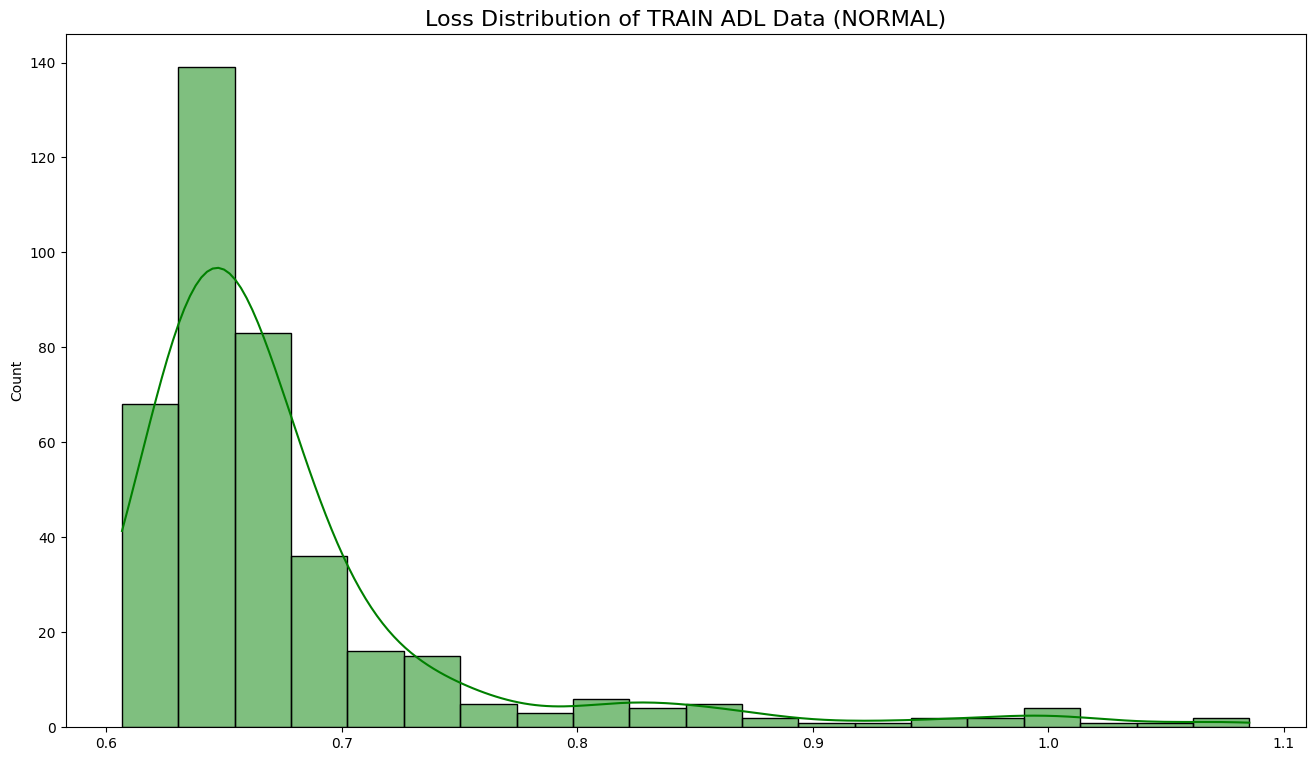

In [21]:
train_dataset = MobiActDataset(train_data)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE)

train_anomalies, train_scores, _ = detect_anomalies(model, ddpm, train_loader, device)

plt.figure(figsize=(16,9))
plt.title('Loss Distribution of TRAIN ADL Data (NORMAL)', fontsize=16)
sns.histplot(train_scores, bins=20, kde=True, color='green')
plt.show()

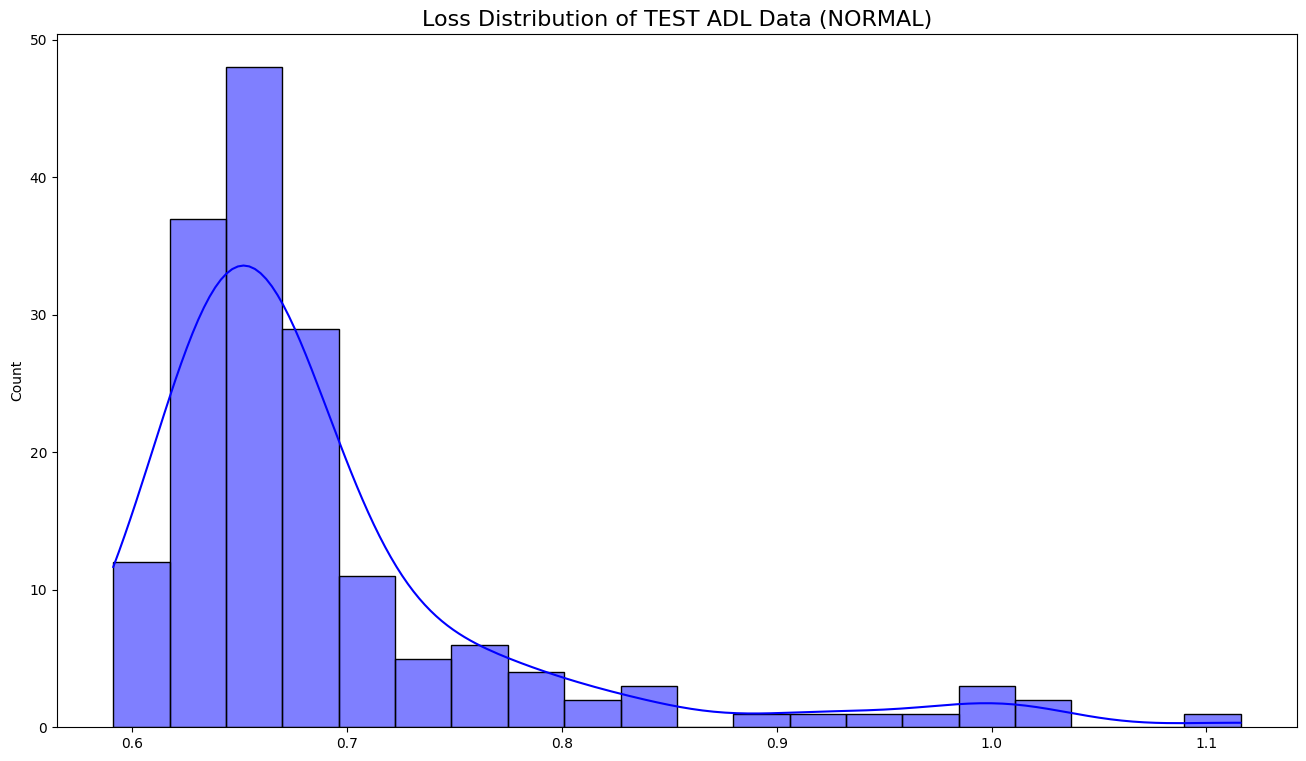

In [22]:
normal_anomalies, normal_scores, _ = detect_anomalies(model, ddpm, normal_loader, device)

plt.figure(figsize=(16,9))
plt.title('Loss Distribution of TEST ADL Data (NORMAL)', fontsize=16)
sns.histplot(normal_scores, bins=20, kde=True, color='blue')
plt.show()

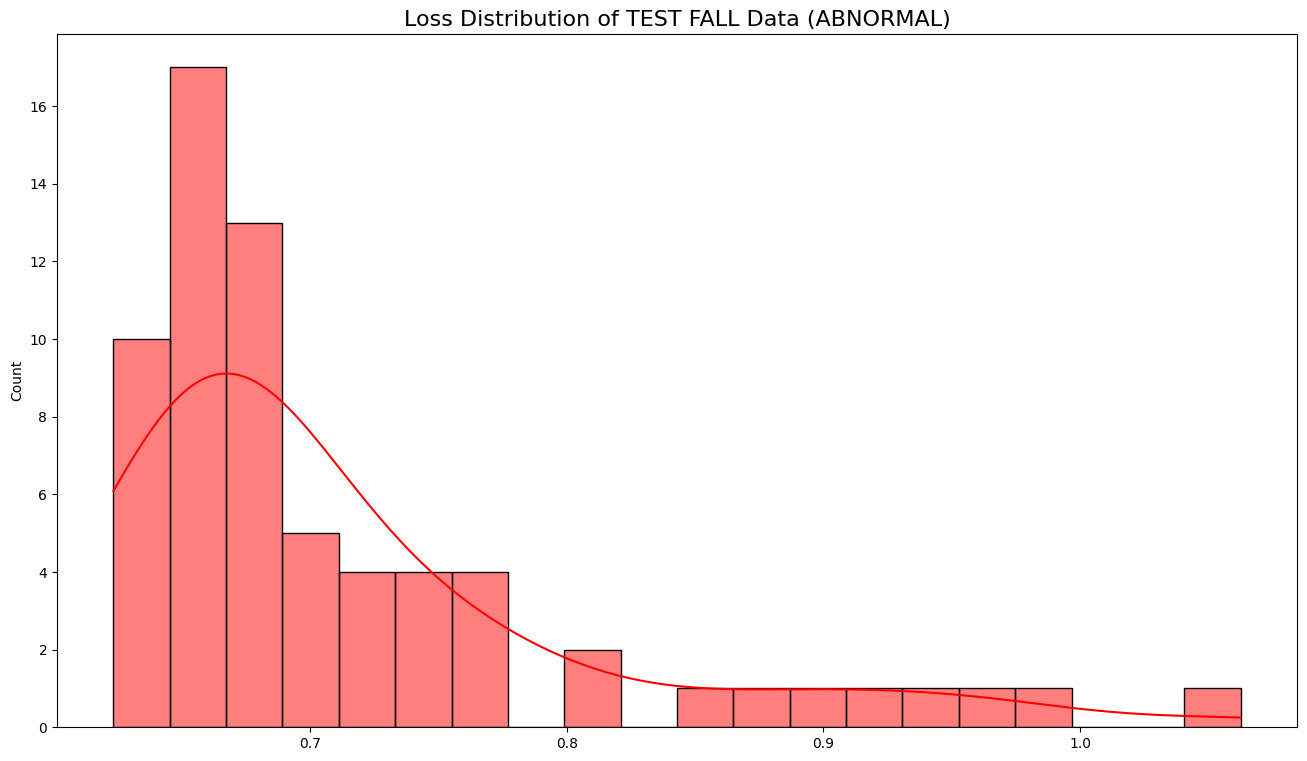

In [23]:
abnormal_anomalies, abnormal_scores, _ = detect_anomalies(model, ddpm, abnormal_loader, device)

plt.figure(figsize=(16,9))
plt.title('Loss Distribution of TEST FALL Data (ABNORMAL)', fontsize=16)
sns.histplot(abnormal_scores, bins=20, kde=True, color='red')
plt.show()

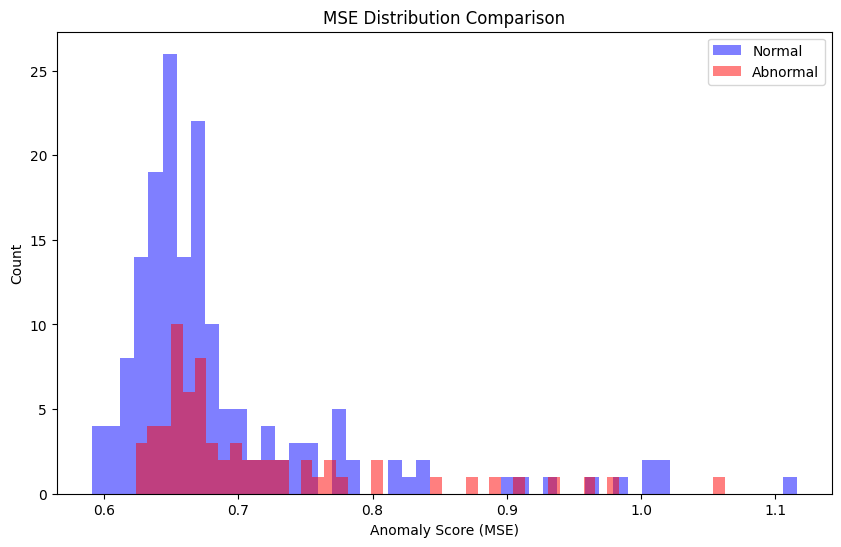

In [24]:
plt.figure(figsize=(10,6))
plt.title('MSE Distribution Comparison')
plt.hist(normal_scores, bins=50, alpha=0.5, color='blue', label='Normal')
plt.hist(abnormal_scores, bins=50, alpha=0.5, color='red', label='Abnormal')
plt.xlabel('Anomaly Score (MSE)')
plt.ylabel('Count')
plt.legend()
plt.show()

In [25]:
error_df = pd.DataFrame({
    'reconstruction_error': np.concatenate([normal_scores, abnormal_scores]),
    'true_class': np.concatenate([np.zeros(len(normal_scores)), np.ones(len(abnormal_scores))])
})

print ("error dataframe head : ")
print(error_df.head(10))
print ()
print ("error dataframe tail : ")
print(error_df.tail(10))
print ()
print(error_df.describe())
print ()
error_df['true_class'].value_counts()

error dataframe head : 
   reconstruction_error  true_class
0              0.653609         0.0
1              0.774911         0.0
2              0.646052         0.0
3              0.734474         0.0
4              0.673954         0.0
5              0.679531         0.0
6              0.815252         0.0
7              1.004602         0.0
8              0.617674         0.0
9              0.701271         0.0

error dataframe tail : 
     reconstruction_error  true_class
224              1.062601         1.0
225              0.673643         1.0
226              0.893877         1.0
227              0.650415         1.0
228              0.977122         1.0
229              0.714327         1.0
230              0.693817         1.0
231              0.683518         1.0
232              0.850669         1.0
233              0.735532         1.0

       reconstruction_error  true_class
count            234.000000  234.000000
mean               0.695606    0.286325
std             

true_class
0.0    167
1.0     67
Name: count, dtype: int64

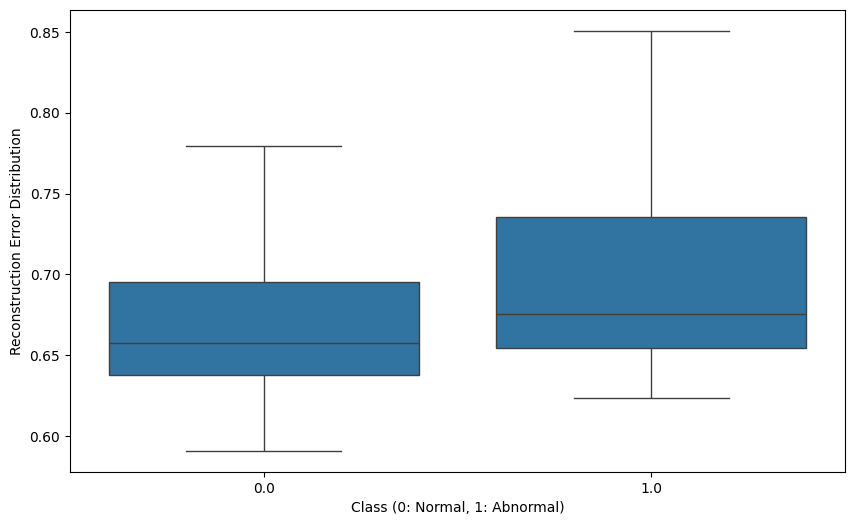

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='true_class', y='reconstruction_error', data=error_df, showfliers=False)
plt.ylabel('Reconstruction Error Distribution')
plt.xlabel('Class (0: Normal, 1: Abnormal)')
plt.show()

In [31]:
threshold = np.percentile(normal_scores, 90)

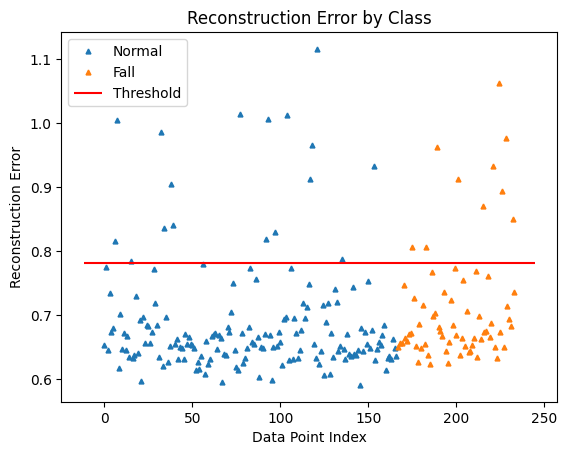

In [32]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='^', ms=3.5, linestyle='',
            label="Normal" if name == 0 else "Fall")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction Error by Class")
plt.ylabel("Reconstruction Error")
plt.xlabel("Data Point Index")
plt.show()

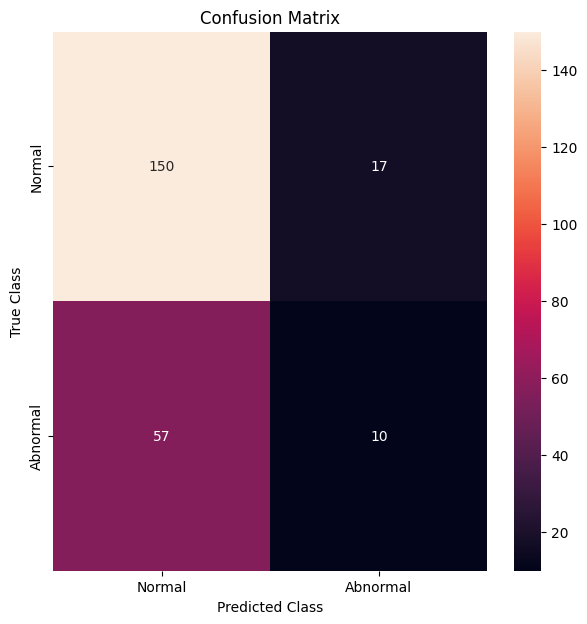

In [33]:
LABELS = ["Normal", "Abnormal"]
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

plt.figure(figsize=(7, 7))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [34]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, _ = precision_recall_fscore_support(error_df.true_class, y_pred, average='binary')
accuracy = accuracy_score(error_df.true_class, y_pred)

print('\nPerformance Metrics:')
print(f'Accuracy Score : {accuracy:.4f}')
print(f'Precision     : {precision:.4f}')
print(f'Recall        : {recall:.4f}')
print(f'F1 Score      : {f1:.4f}')


Performance Metrics:
Accuracy Score : 0.6838
Precision     : 0.3704
Recall        : 0.1493
F1 Score      : 0.2128
